In [36]:
import pandas as pd
import glob
import os

path = "/home/hx/PythonImplementation/qsub_results/montaez"                     
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)
df.head()

,Unnamed: 0,acc,batch_size,dropout_rate,epochs,l1_reg,l2_reg,loss,lr,optimizer,val_acc,val_loss
0,0,"[0.49166666666666664, 0.4875, 0.50833333333333...",32,0.1,500,0.000001,0.1,"[3.8679059664408366, 3.8669599533081054, 3.865...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",<keras.optimizers.SGD object at 0x14c50408acc0>,"[0.43333333532015483, 0.43333333532015483, 0.4...","[3.867119312286377, 3.8661028861999513, 3.8650..."
1,1,"[0.4125, 0.425, 0.44166666666666665, 0.4541666...",32,0.1,500,0.000001,0.1,"[3.8480008602142335, 3.846992095311483, 3.8459...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",<keras.optimizers.SGD object at 0x14c50408acc0>,"[0.41666666269302366, 0.4333333293596903, 0.45...","[3.847352695465088, 3.8462409814198812, 3.8451..."
2,2,"[0.6541666666666667, 0.6541666666666667, 0.65,...",32,0.1,500,0.000001,0.1,"[3.8264533042907716, 3.825379260381063, 3.8244...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",<keras.optimizers.SGD object at 0x14c50408acc0>,"[0.6666666547457377, 0.6833333214124043, 0.683...","[3.825862471262614, 3.8248005231221516, 3.8237..."
3,3,"[0.625, 0.6375, 0.6416666666666667, 0.64583333...",32,0.1,500,0.000001,0.1,"[3.8062514781951906, 3.8051544030507407, 3.804...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",<keras.optimizers.SGD object at 0x14c50408acc0>,"[0.850000011920929, 0.850000011920929, 0.85000...","[3.8038549423217773, 3.802796713511149, 3.8017..."
4,4,"[0.49583333333333335, 0.5208333333333334, 0.5,...",32,0.1,500,0.000001,0.1,"[3.8326863288879394, 3.822667376200358, 3.8127...","[0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0...",<keras.optimizers.SGD object at 0x14c50408af98>,"[0.5333333333333333, 0.549999992052714, 0.5499...","[3.8267154057820636, 3.816703701019287, 3.8067..."


In [37]:
from ast import literal_eval
import numpy as np

df.val_acc = df.val_acc.apply(literal_eval)
df.val_loss = df.val_loss.apply(literal_eval)
df.acc = df.acc.apply(literal_eval)
df.loss = df.loss.apply(literal_eval)
df.lr = df.lr.apply(literal_eval)

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~hxkm/0 or inside your plot.ly account where it is named 'basic-line'


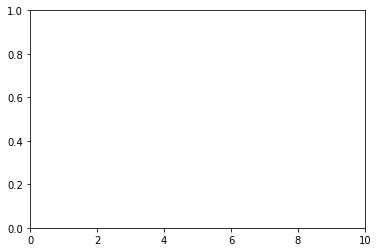

In [38]:
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1)

axes.set_xlim((0,10))
axes.set_ylim((0,1))

traces = []
for i, row in df.iterrows():
    
    if(row.val_acc[-1]>0.7 and row.val_acc[0]<0.6):
        trace = go.Scatter(
            x = np.arange(len(row.val_acc)),
            y = row.val_acc,
            name='l1:{}; l2:{}; dropout:{}; lr:{}'.format(row.l1_reg,row.l2_reg, row.dropout_rate,row.lr[0] ),
            showlegend=False
        )
        traces.append(trace)
    
    
py.iplot(traces, filename='basic-line')